In [1]:
#use the cifar architecture sample from udacity
#try resnet & compare performance measures
#research the best architecture & compare performance measures
#implement the architecture

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def accuracy_loss_plot(history):
    plt.Figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()
    plt.Figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

In [4]:
data = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()

In [5]:
data

{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [6]:
data['features'][0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.60784314,
       0.9254902 , 0.81176471, 0.69803922, 0.41960784, 0.61176471,
       0.63137255, 0.42745098, 0.25098039, 0.09019608, 0.30196078,
       0.50980392, 0.28235294, 0.05882353])

In [7]:
data['features'].shape

(60000, 28, 28)

In [8]:
data['features'][0][6].shape

(28,)

In [9]:
data['target']

array([5., 2., 1., ..., 3., 1., 4.])

In [10]:
data['target'].shape

(60000,)

In [11]:
s = pd.Series(data['target'])
target = s.replace([1, 2, 3, 4, 5], [0, 1, 2, 3, 4])
target = target.to_numpy()
target

array([4., 1., 0., ..., 2., 0., 3.])

In [12]:
target.shape

(60000,)

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [14]:
X_train.shape

(48000, 28, 28)

In [15]:
X_val.shape

(6000, 28, 28)

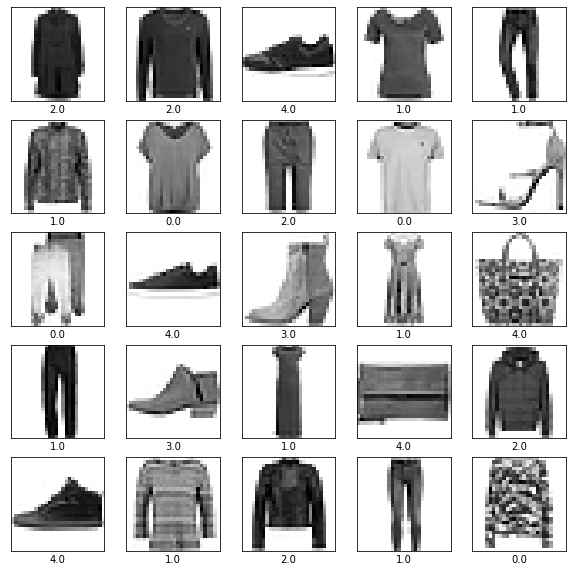

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [17]:
#plot the label distribution
import pandas as pd
df_label = pd.DataFrame(data['target'])

In [18]:
df_label.head()

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0


In [19]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
1.0    11989
5.0    11989
dtype: int64

Data is almost evenly distributed among the labels

In [20]:
# Deep Learning Libraries
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [21]:
#output softmax layer should have 5 outputs
# Building a ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [23]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val), batch_size=128)

Epoch 1/50
375/375 [==============================] - 32s 87ms/step - loss: 1.0275 - accuracy: 0.8766 - val_loss: 1.0375 - val_accuracy: 0.8667
Epoch 2/50
375/375 [==============================] - 32s 85ms/step - loss: 1.0275 - accuracy: 0.8762 - val_loss: 1.0422 - val_accuracy: 0.8605
Epoch 3/50
375/375 [==============================] - 32s 86ms/step - loss: 1.0261 - accuracy: 0.8771 - val_loss: 1.0332 - val_accuracy: 0.8702
Epoch 4/50
375/375 [==============================] - 32s 85ms/step - loss: 1.0260 - accuracy: 0.8778 - val_loss: 1.0451 - val_accuracy: 0.8587
Epoch 5/50
375/375 [==============================] - 30s 81ms/step - loss: 1.0233 - accuracy: 0.8808 - val_loss: 1.0290 - val_accuracy: 0.8757
Epoch 6/50
375/375 [==============================] - 31s 82ms/step - loss: 1.0239 - accuracy: 0.8801 - val_loss: 1.0320 - val_accuracy: 0.8722
Epoch 7/50
375/375 [==============================] - 30s 81ms/step - loss: 1.0217 - accuracy: 0.8824 - val_loss: 1.0380 - val_accuracy:

In [32]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

188/188 - 1s - loss: 1.0194 - accuracy: 0.8842
0.8841666579246521


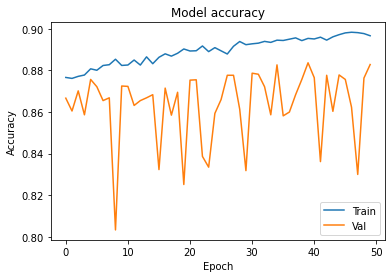

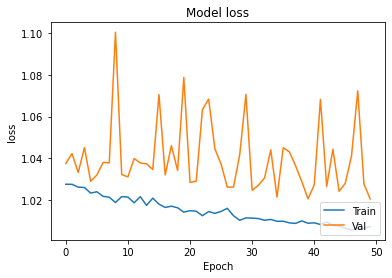

In [33]:
accuracy_loss_plot(history)

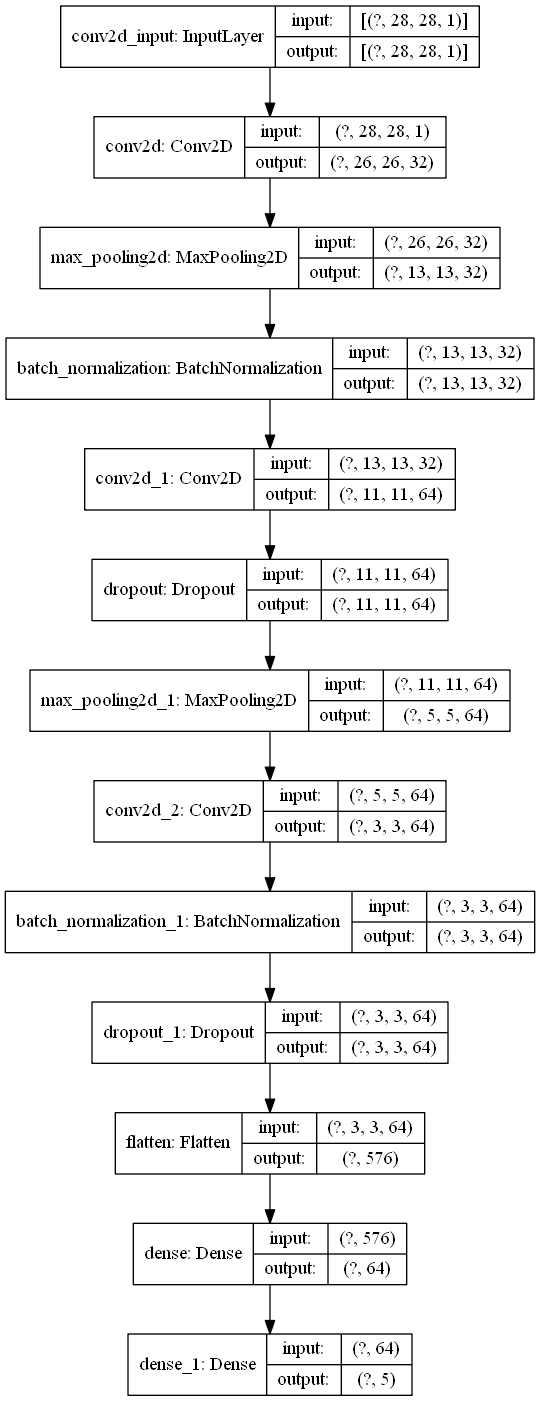

In [34]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, rankdir="TD")

In [35]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [36]:
datagen.fit(X_train)

### Data Augmentation

Should we augment validation

#### Types of Augmentation
1. Rotation
2. Zoom
3. Shear
4. Flip

In [ ]:
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot after
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train,y_train,batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [ ]:
batch_size = 128
epochs = 30
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


# Fit the Model
history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
accuracy_loss_plot(history)

In [ ]:
#plot all architectures and write references
#compare accuracies
#write about choice of all hyperparameters - no of epochs etc